In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

In [124]:
"""
Airports
Airport ID 	Unique OpenFlights identifier for this airport.
Name 	Name of airport. May or may not contain the City name.
City 	Main city served by airport. May be spelled differently from Name.
Country 	Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
IATA 	3-letter IATA code. Null if not assigned/unknown.
ICAO 	4-letter ICAO code.
Null if not assigned.
Latitude 	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
Longitude 	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
Altitude 	In feet.
Timezone 	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
DST 	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
Tz database time zone 	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
Type 	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
Source 	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

Routes
Airline 	2-letter (IATA) or 3-letter (ICAO) code of the airline.
Airline ID 	Unique OpenFlights identifier for airline (see Airline).
Source airport 	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
Source airport ID 	Unique OpenFlights identifier for source airport (see Airport)
Destination airport 	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
Destination airport ID 	Unique OpenFlights identifier for destination airport (see Airport)
Codeshare 	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
Stops 	Number of stops on this flight ("0" for direct)
Equipment 	3-letter codes for plane type(s) generally used on this flight, separated by spaces
"""
None

In [125]:
airports = pd.read_csv('airports.dat', header=None, names=['AirportID', 'Name', 'Country', 'City', 
                                              'IATA', 'ICAO', 'Latitude', 'Longitude',
                                             'Altitude', 'Timezone', 'DST', 'TZ', 'Type', 'Source'])
routes = pd.read_csv('routes.dat', header=None, names=['Airline', 'AirlineID', 'Source', 
                                                       'SourceID', 'Dest', 'DestID',
                                                      'Codeshare', 'Stops', 'Equipment'])

In [126]:
airports.head()

AirportID                                         Name       Country  \
0          1                               Goroka Airport        Goroka   
1          2                               Madang Airport        Madang   
2          3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3          4                               Nadzab Airport        Nadzab   
4          5  Port Moresby Jacksons International Airport  Port Moresby   

               City IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     TZ     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [127]:
routes.head()

Airline AirlineID Source SourceID Dest DestID Codeshare  Stops Equipment
0      2B       410    AER     2965  KZN   2990       NaN      0       CR2
1      2B       410    ASF     2966  KZN   2990       NaN      0       CR2
2      2B       410    ASF     2966  MRV   2962       NaN      0       CR2
3      2B       410    CEK     2968  KZN   2990       NaN      0       CR2
4      2B       410    CEK     2968  OVB   4078       NaN      0       CR2

In [128]:
routes.head()
def deg2rad(deg):
    return deg*(np.pi/180)

def get_distnace(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    a = np.power(np.sin(dlat/2),2) + \
        np.cos(deg2rad(lat1))*np.cos(deg2rad(lat2))*np.power(np.sin(dlon/2),2)
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R*c

In [129]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
worldmap = gpd.read_file(url)
worldmap = worldmap.to_crs({'init': 'epsg:3857'})

max_amount = float(airports['Altitude'].max())

hmap = folium.Map(location=[42.5, -75.5], zoom_start=2, )

hm_wide = HeatMap( list(zip(airports.Latitude.values, airports.Longitude.values, airports.Altitude.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(worldmap).add_to(hmap)
hmap.add_child(hm_wide)

In [130]:
locations = airports[['AirportID', 'Latitude', 'Longitude']].set_index('AirportID').to_dict()

In [131]:
dest_frequency = routes['DestID'].value_counts()
source_frequency = routes['SourceID'].value_counts()

dest_frequency = dest_frequency.reset_index()
dest_frequency.columns = ['Airport', 'Occ']
source_frequency = source_frequency.reset_index()
source_frequency.columns = ['Airport', 'Occ']

In [132]:
m = folium.Map(location=[42.5, -75.5], zoom_start=2, )
quantiles = dest_frequency['Occ'].quantile([0.7, 0.88, 0.95]).values
def map_size(value):
    # map to inferno
    if value > quantiles[2]:
        return '#d12020'
    if value > quantiles[1]:
        return '#de4414'
    if value > quantiles[0]:
        return '#c5931b'
    else:
        return '#2b2a2a'
    
def map_func(x, col):
    try:
        x = int(x)
        return locations[col][x]
    except:
        return np.nan
    
for airport in dest_frequency['Airport'].unique():
    lon = map_func(airport, 'Longitude')
    lat = map_func(airport, 'Latitude')
    if lon == np.nan: continue
    if math.isnan(lon): continue
    val = dest_frequency['Occ'].loc[dest_frequency['Airport'] == airport].to_numpy()[0]
    color = map_size(val)
    name = airports['Name'].loc[airports['AirportID'] == int(airport)].to_numpy()[0]
    c = folium.Circle(
      location=[lat, lon],
      popup=name,
      radius=int(val*200),
      color=color,
      fill=True,
      fill_color=color
    ).add_to(m)
    
legend_html =  '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 100px; height: 150px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Hue: Size <br>
                              &nbsp; 95% &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#d12020"></i><br>
                              &nbsp; 88% &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#de4414"></i><br>
                              &nbsp; 70% &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#c5931b"></i><br>
                              &nbsp; less &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#2b2a2a"></i>
                </div>
                ''' 
m.get_root().html.add_child(folium.Element(legend_html))
m.save('Airports2.html')
m

In [133]:

routes = routes[routes['SourceID'] != '\\N']
routes['SourceLat'] = routes['SourceID'].map(lambda x: map_func(x, 'Latitude'))
routes['SourceLon'] = routes['SourceID'].map(lambda x: map_func(x, 'Longitude'))
routes['DestLat'] = routes['DestID'].map(lambda x: map_func(x, 'Latitude'))
routes['DestLon'] = routes['DestID'].map(lambda x: map_func(x, 'Longitude'))
routes['Distance'] = routes[['SourceLat', 'SourceLon', 'DestLat', 'DestLon']].apply(lambda d:
                                                                                   get_distnace(d['SourceLat'],
                                                                                                d['SourceLon'],
                                                                                                d['DestLat'],
                                                                                                d['DestLon']), axis=1)
routes.dropna(inplace=True)

In [134]:
from collections import Counter
airlines = routes['Airline'].unique()
airline_dict = Counter(airlines)
for airline in airline_dict:
    x = np.sum(routes['Distance'][routes['Airline'] == airline])
    airline_dict[airline] = x

In [135]:
planes = routes['Equipment'].unique()
plane_dict = Counter()
for el in planes:
    plns = el.split(' ')
    if len(plns) == 1:
        plane_dict[el] += 1
    else:
        for pln in plns:
            plane_dict[pln] += 1
plane_distances = Counter()
for plane in plane_dict:
    x = np.sum(routes['Distance'][routes['Equipment'].str.contains(plane)])
    plane_distances[plane] += x

In [136]:
planes = pd.DataFrame({'plane': list(plane_dict.keys())})
planes['flown'] = planes['plane'].map(lambda x: plane_distances[x])
planes['occ'] = planes['plane'].map(lambda x: plane_dict[x])

In [137]:
makers = ['Aerospatiale', 'Airbus', 'Boeing', 'Tupolev', 
          'Avro', 'Anotnov', 'Jetstream', 'Cessna', 'Pilatus', 'Learjet',
         'Dassault', 'Embraer', 'McDonnell', 'Fokker', 'Bombardier',
         'Canadair', 'Ilyushin', 'Lockheed', 'De Havilland', 'Sikorsky']
def fuzzy_names(name, makers):
    for maker in makers:
        if maker in name:
            return maker
    else:
        return 'None'
    
def fuzzy_planes(plane):
    for var in ['IATA', 'ICAO']:
        p =  extended_planes['Company'].loc[extended_planes[var] == plane].to_numpy()
        if len(p) != 0:
            return p[0]
        else:
            if plane.startswith('C'):
                return 'Canadair'
            elif plane.startswith('E'):
                return 'Embraer'
            elif plane.startswith('7'):
                return 'Boeing'
            elif plane.startswith('3'):
                return 'Airbus'
            else: return 'None'
    
extended_planes = pd.read_csv('planes.dat', header=None, names=['Name', 'IATA', 'ICAO'])
extended_planes['Name'].unique()
extended_planes['Company'] = extended_planes['Name'].map(lambda x: fuzzy_names(x, makers))
extended_planes = extended_planes[extended_planes['Company'] != 'None']
planes['company'] = planes['plane'].map(lambda x: fuzzy_planes(x))

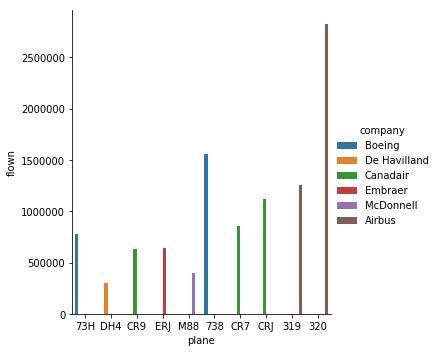

In [138]:
plt.rcParams['figure.figsize'] = [50, 20]
# ax = sns.scatterplot(x='plane', y="flown", size='occ', hue='company', data=planes.sort_values('occ').tail(10)) 
ax = sns.catplot(x='plane', y='flown', hue='company', kind='bar', data=planes.sort_values('occ').tail(10))
plt.savefig('Planes.png')

In [139]:
# def aggregate_keys(mdict):
#     new_dict = Counter()
#     for key in mdict:
#         planes_list = mdict[key].split(' ')
#         if len(planes_list) == 0:
#             new_dict[key] += mdict[key]
#         else:
#             for 

In [140]:
most_popular_airlines = routes['Airline'].value_counts().head(10).reset_index()
most_popular_airlines.columns = ['Airline', 'Occ']
most_popular_planes = planes.sort_values('occ').tail(10)

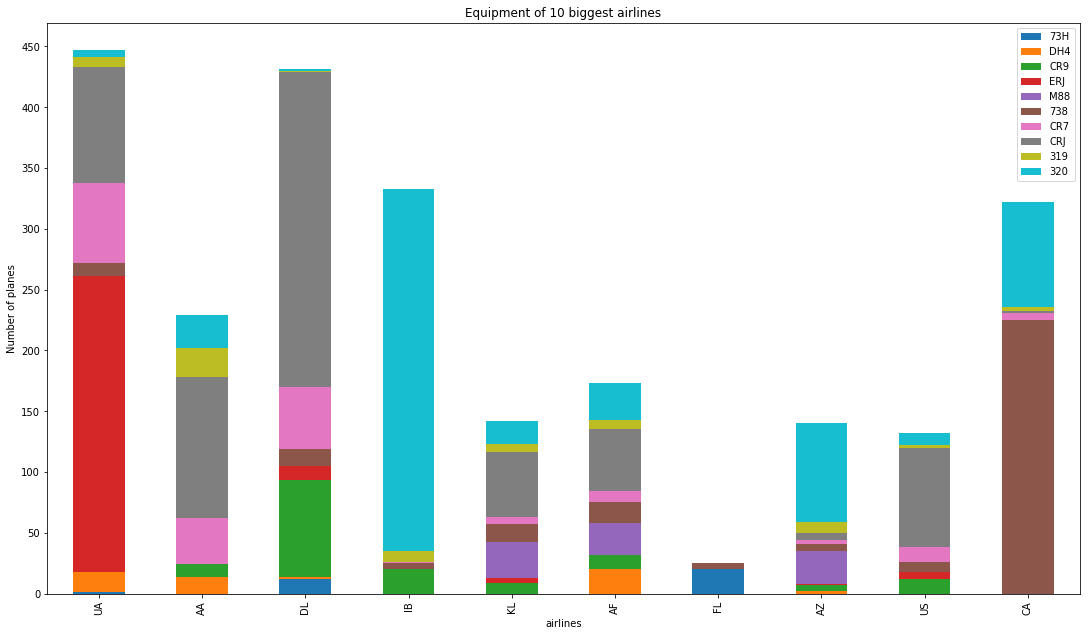

In [19]:
# stacked bar of airlines 
airlines = most_popular_airlines['Airline']
plns = most_popular_planes['plane']
airline_planes = {model: [] for model in plns}

for airline in airlines:
    p = routes['Equipment'].loc[routes['Airline'] == airline].value_counts().to_dict()
    for model in plns:
        if model in p:
            airline_planes[model].append(p[model])
        else:
            airline_planes[model].append(0)
index = pd.Index(airlines, name='airlines')
ndf = pd.DataFrame(airline_planes, index=index)
ax = ndf.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
plt.title('Equipment of 10 biggest airlines')
plt.ylabel('Number of planes')
_ =plt.yticks([i*50 for i in range(10)])
plt.savefig('Airlines_small.png')

In [20]:
# # stacked bar of airlines 

# airlines = routes['Airline'].unique()
# plns = planes['plane'].unique()
# airline_planes = {model: [] for model in plns}

# for airline in airlines:
#     p = routes['Equipment'].loc[routes['Airline'] == airline].value_counts().to_dict()
#     for model in plns:
#         if model in p:
#             airline_planes[model].append(p[model])
#         else:
#             airline_planes[model].append(0)
# index = pd.Index(airlines, name='airlines')
# ndf = pd.DataFrame(airline_planes, index=index)
# ax = ndf.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
# plt.savefig('Airlines_big.png')

In [141]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [142]:
dest_frequency.columns = ['AirportID', 'Occurency']

result = pd.concat([airports[['AirportID', 'Latitude', 'Longitude', 'Altitude']], dest_frequency], sort=True).fillna(0)

In [45]:
tsne = TSNE(n_components=2, perplexity=35)
Y = tsne.fit_transform(result[['Latitude', 'Longitude', 'Occurency', 'Altitude']])

In [70]:
clf = KMeans(n_clusters=50, n_jobs=-1)
clf.fit_transform(Y)

array([[160.36516 ,  38.90913 , 125.535126, ...,  43.128555, 121.308174,
        129.6982  ],
       [ 27.7183  , 105.03925 ,  76.197556, ..., 117.48312 ,  97.16356 ,
         22.702389],
       [160.1311  ,  39.360638, 126.48215 , ...,  41.85901 , 122.49746 ,
        129.46956 ],
       ...,
       [ 92.26663 ,  36.765266,  61.509693, ...,  64.32813 ,  68.95088 ,
         63.156433],
       [ 92.30113 ,  36.318645,  62.315742, ...,  63.56078 ,  69.741165,
         63.09019 ],
       [ 92.250916,  36.362053,  62.308563, ...,  63.579193,  69.74975 ,
         63.04035 ]], dtype=float32)

In [71]:
labels = clf.labels_
print(labels)

[40 38 40 ...  4  4  4]


Text(0.5, 1.0, 'UFO LANDING IN MISSOURI')

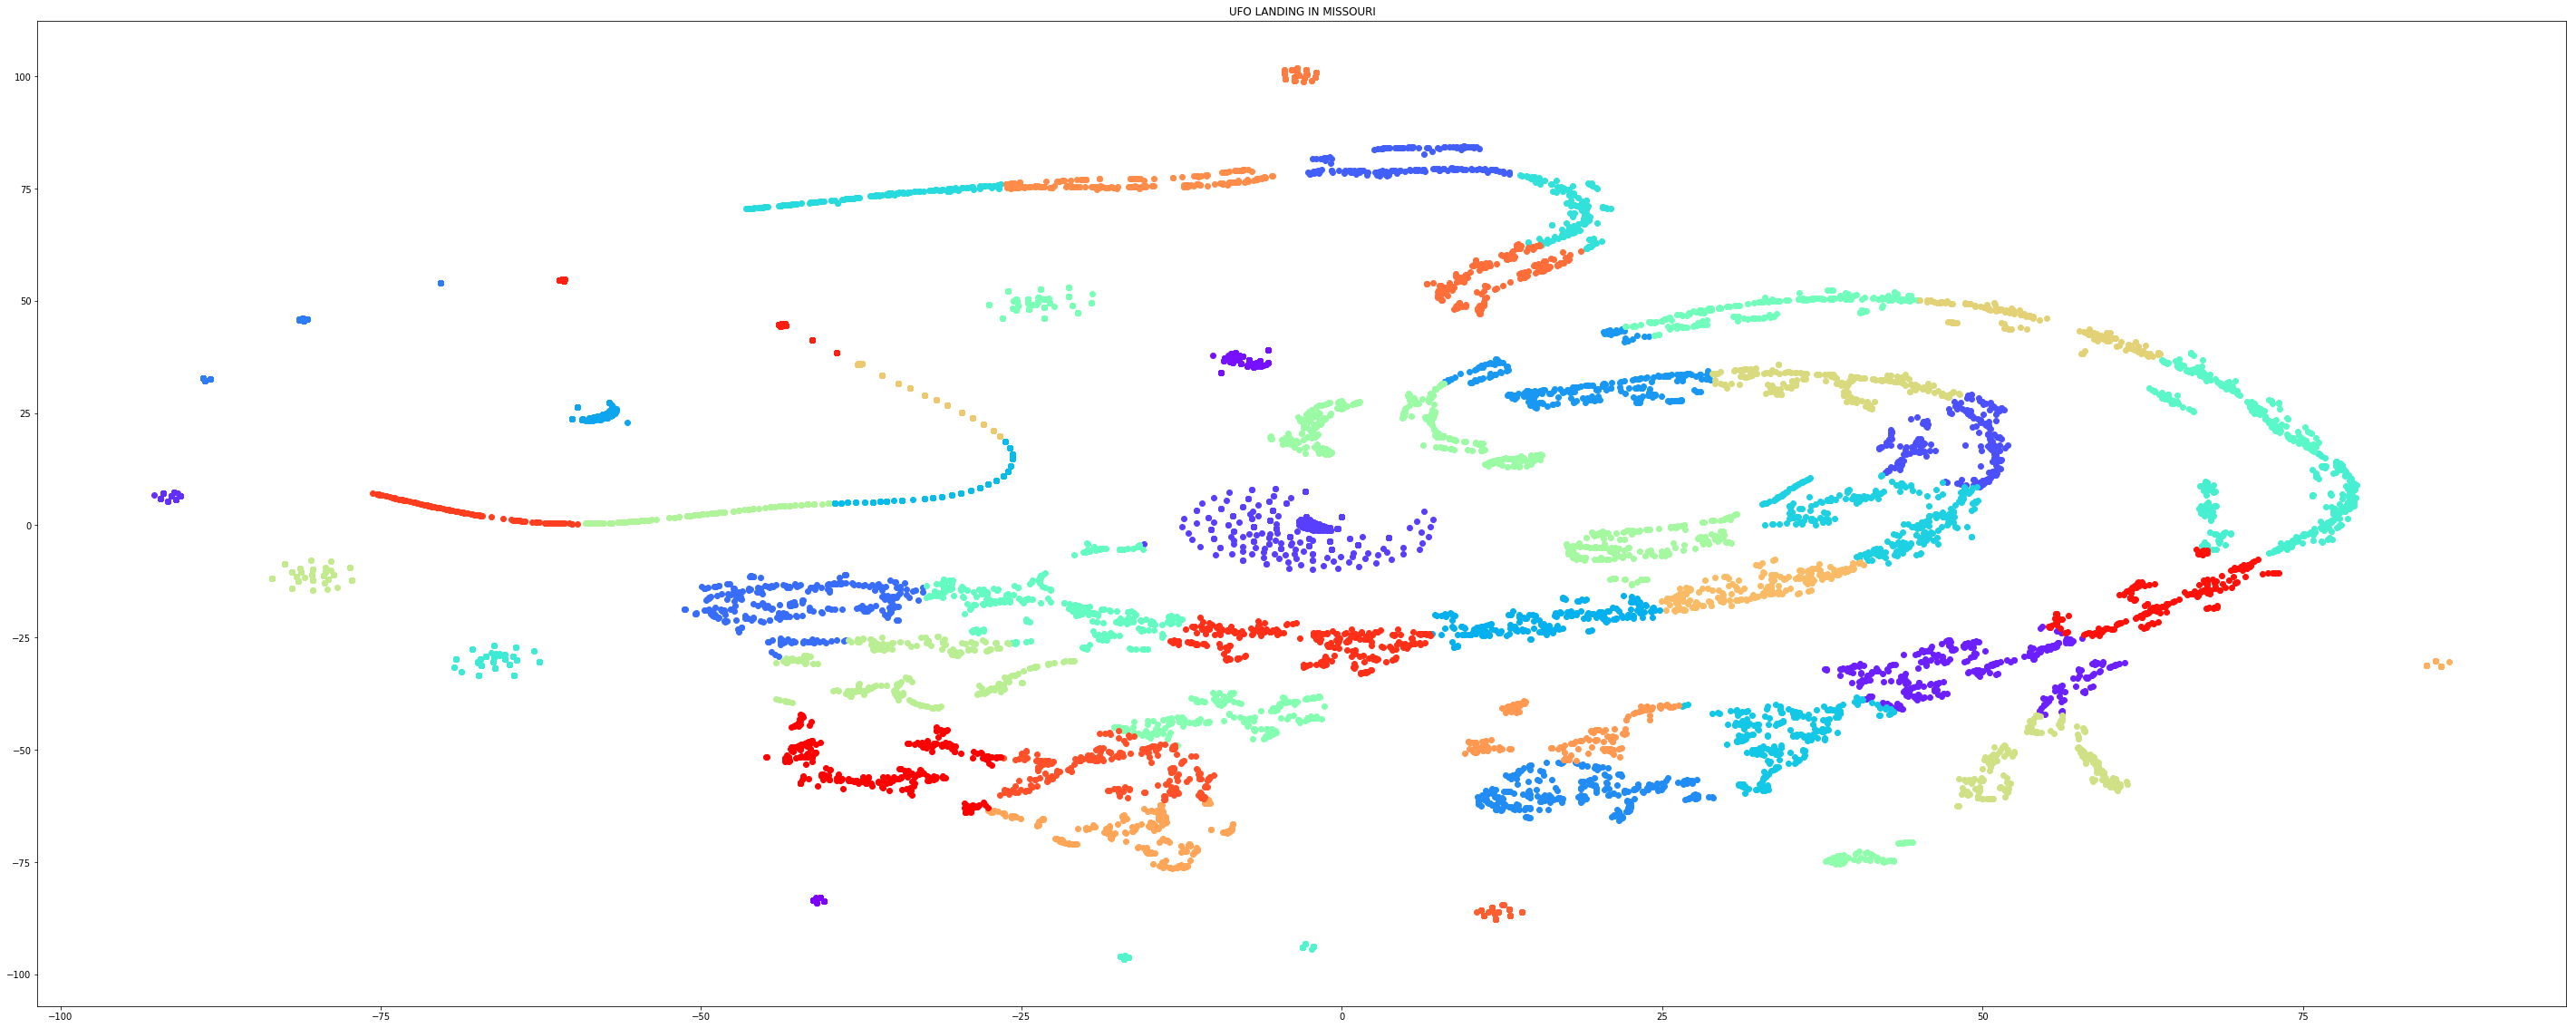

In [73]:
from matplotlib import cm
viridis = cm.get_cmap('viridis')
# colors = np.arange(0,len(labels))
fig = plt.figure()
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
for lab, col in zip(np.unique(labels), colors):
    ax.scatter(Y[labels==lab, 0], Y[labels==lab, 1], color=col)
plt.title("UFO LANDING IN MISSOURI")

Text(0.5, 1.0, 'UFO LANDING IN MISSOURI2')

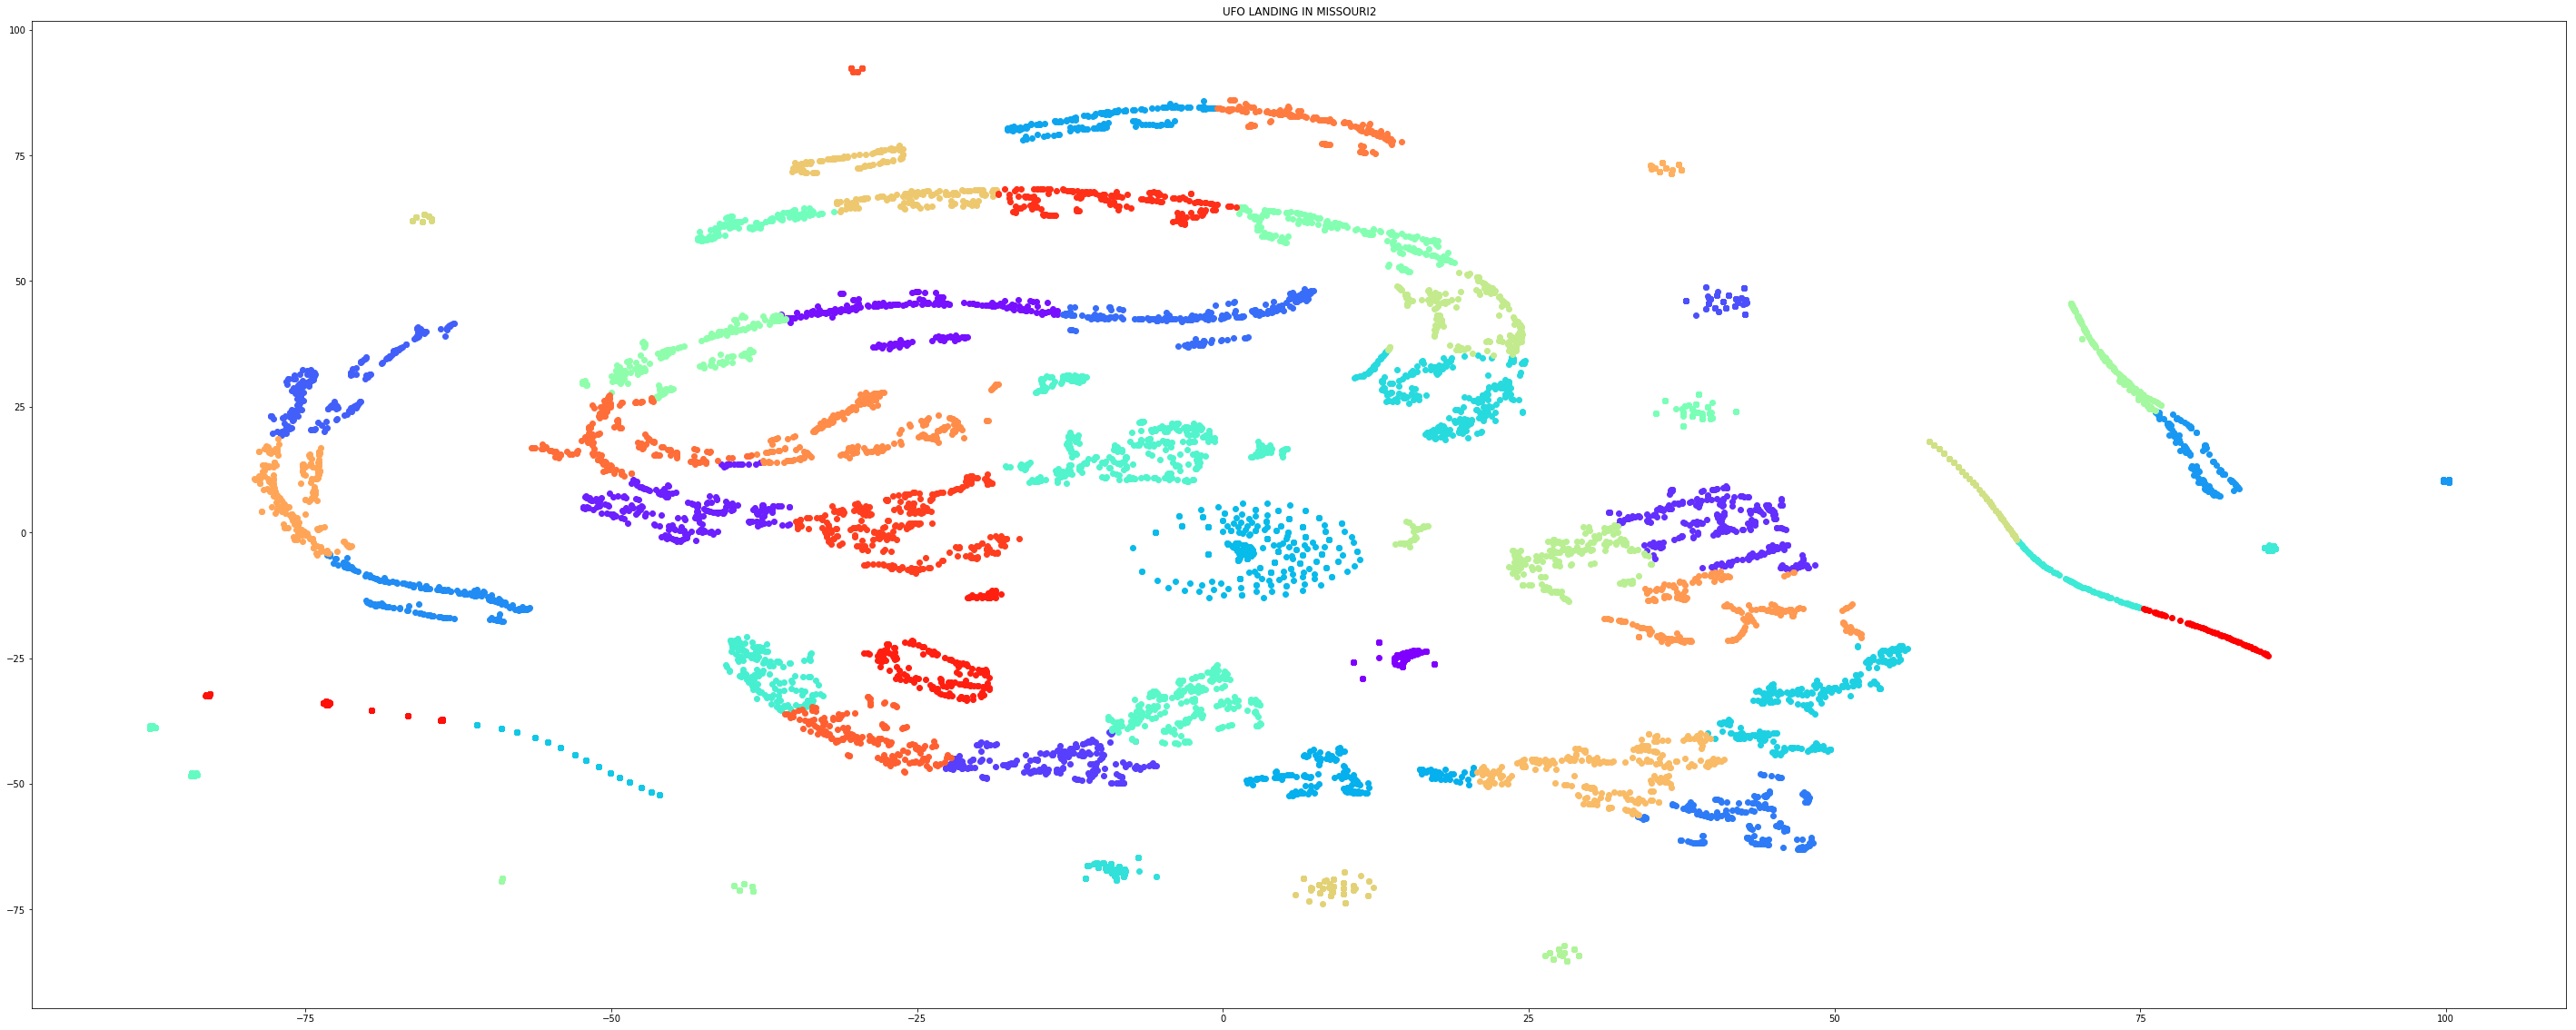

In [74]:

tsne = TSNE(n_components=2, perplexity=35)
Y = tsne.fit_transform(result[['Latitude', 'Longitude', 'Occurency', 'Altitude']])
clf.fit_transform(Y)
labels = clf.labels_
fig = plt.figure()
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
for lab, col in zip(np.unique(labels), colors):
    ax.scatter(Y[labels==lab, 0], Y[labels==lab, 1], color=col)
plt.title("UFO LANDING IN MISSOURI2")

In [143]:
source_frequency.columns = ['AirportID', 'Occurency']
result2 = pd.concat([airports[['AirportID', 'Latitude', 'Longitude', 'Altitude', 'Timezone']], 
                     dest_frequency, source_frequency], sort=True).fillna(0)

Text(0.5, 1.0, 'UFO LANDING IN MISSOURI_50')

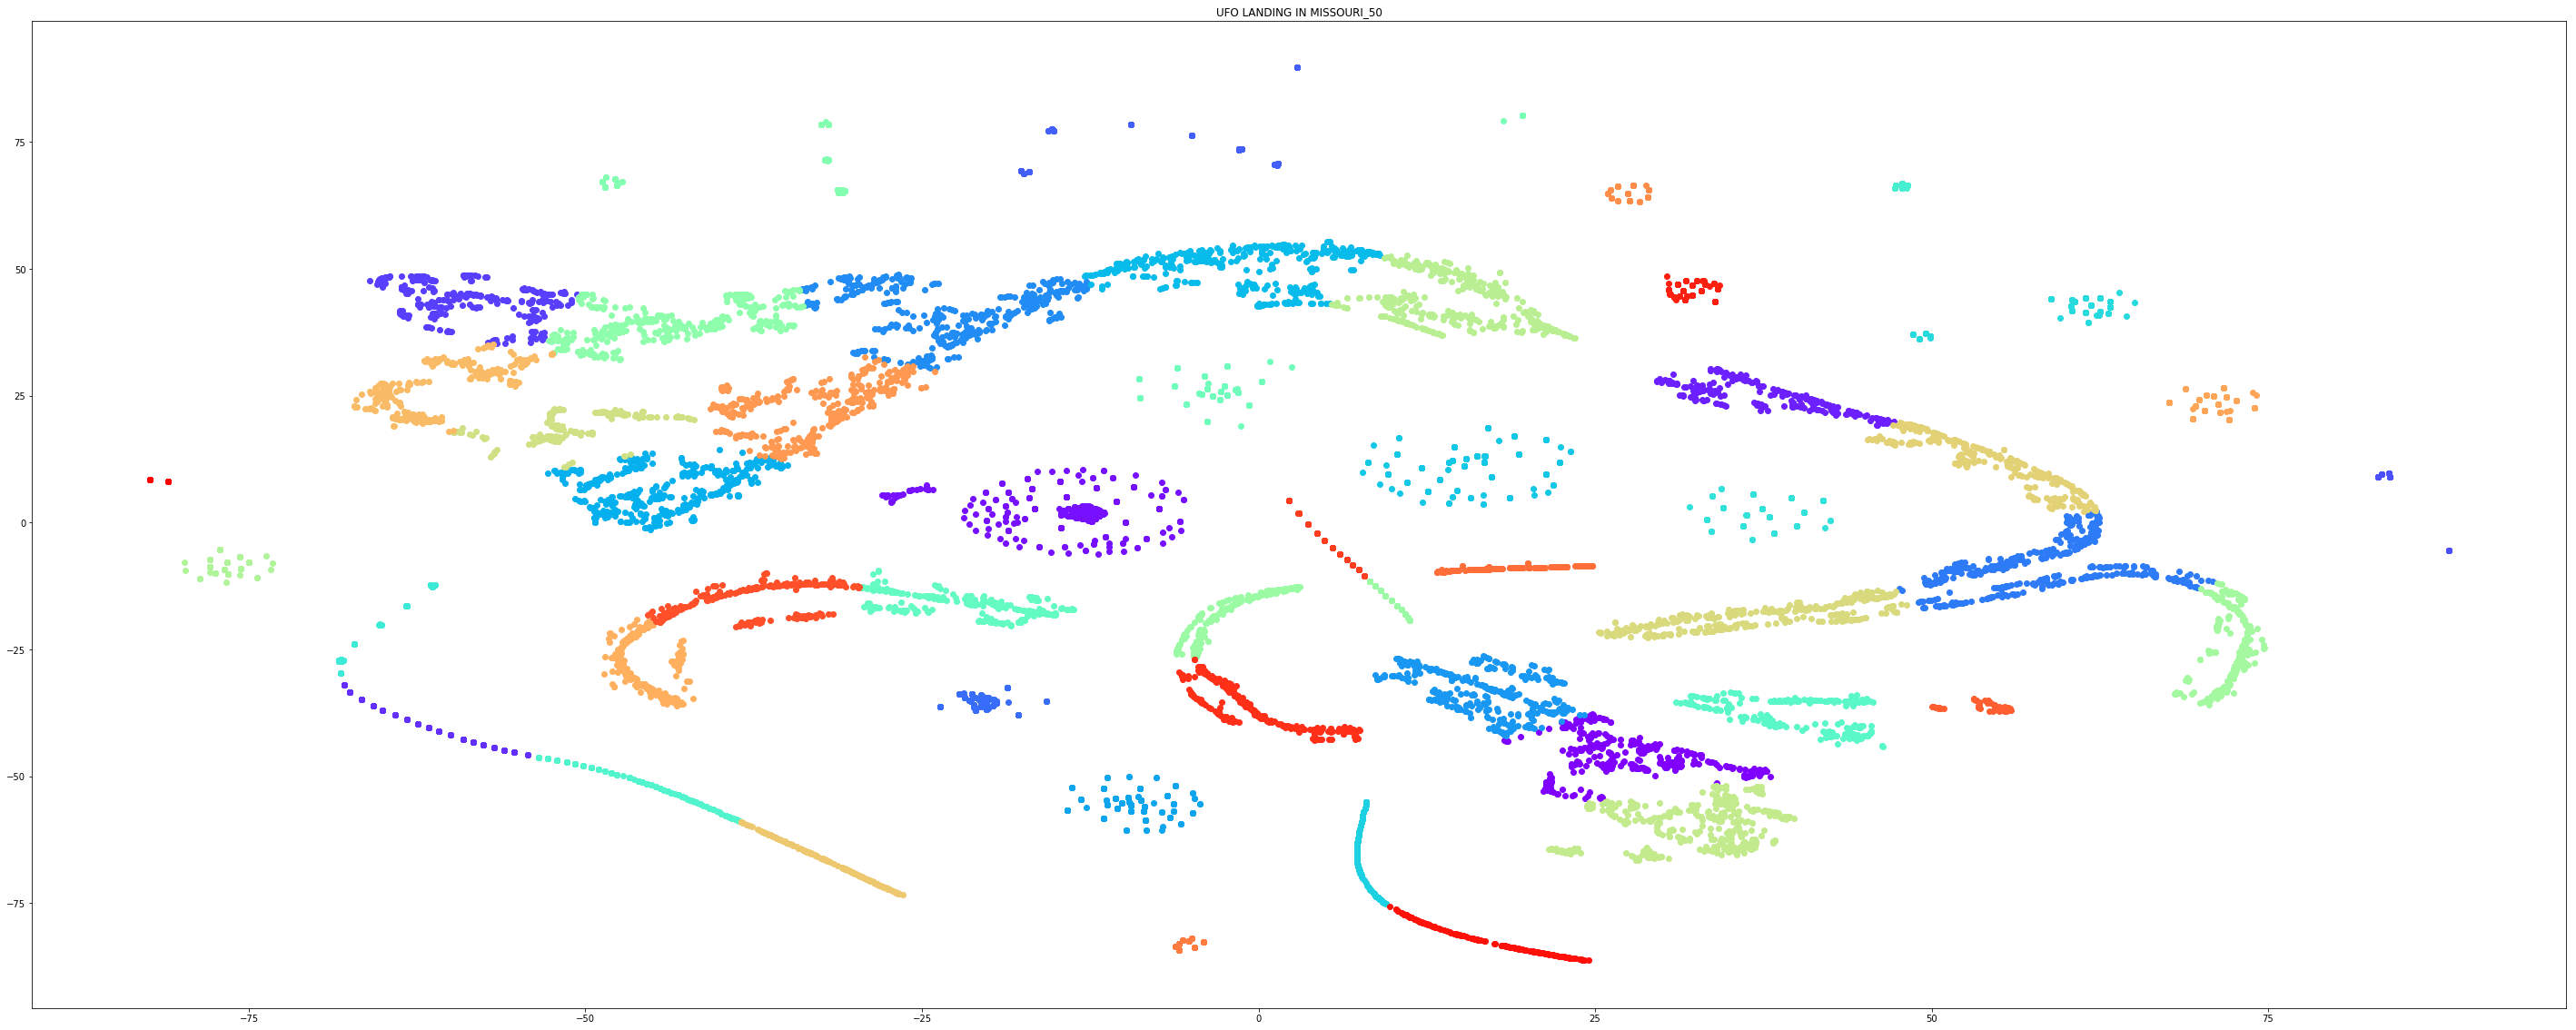

In [102]:
source_frequency.columns = ['AirportID', 'SOccurency']
dest_frequency.columns = ['AirportID', 'DOccurency']
result2 = pd.concat([airports[['AirportID', 'Latitude', 'Longitude', 'Altitude', 'Timezone']], 
                     dest_frequency, source_frequency], sort=True).fillna(0)
result2['Timezone'] = result2['Timezone'].replace('\\N', '0')
result2['Timezone'].astype(float, inplace=True)
perplexity = 50
tsne = TSNE(n_components=2, perplexity=perplexity)
Y = tsne.fit_transform(result2[['Latitude', 'Longitude', 'DOccurency','SOccurency', 'Timezone', 'Altitude']])
clf.fit_transform(Y)
labels = clf.labels_
fig = plt.figure()
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
for lab, col in zip(np.unique(labels), colors):
    ax.scatter(Y[labels==lab, 0], Y[labels==lab, 1], color=col)
plt.title(f"UFO LANDING IN MISSOURI_{perplexity}")

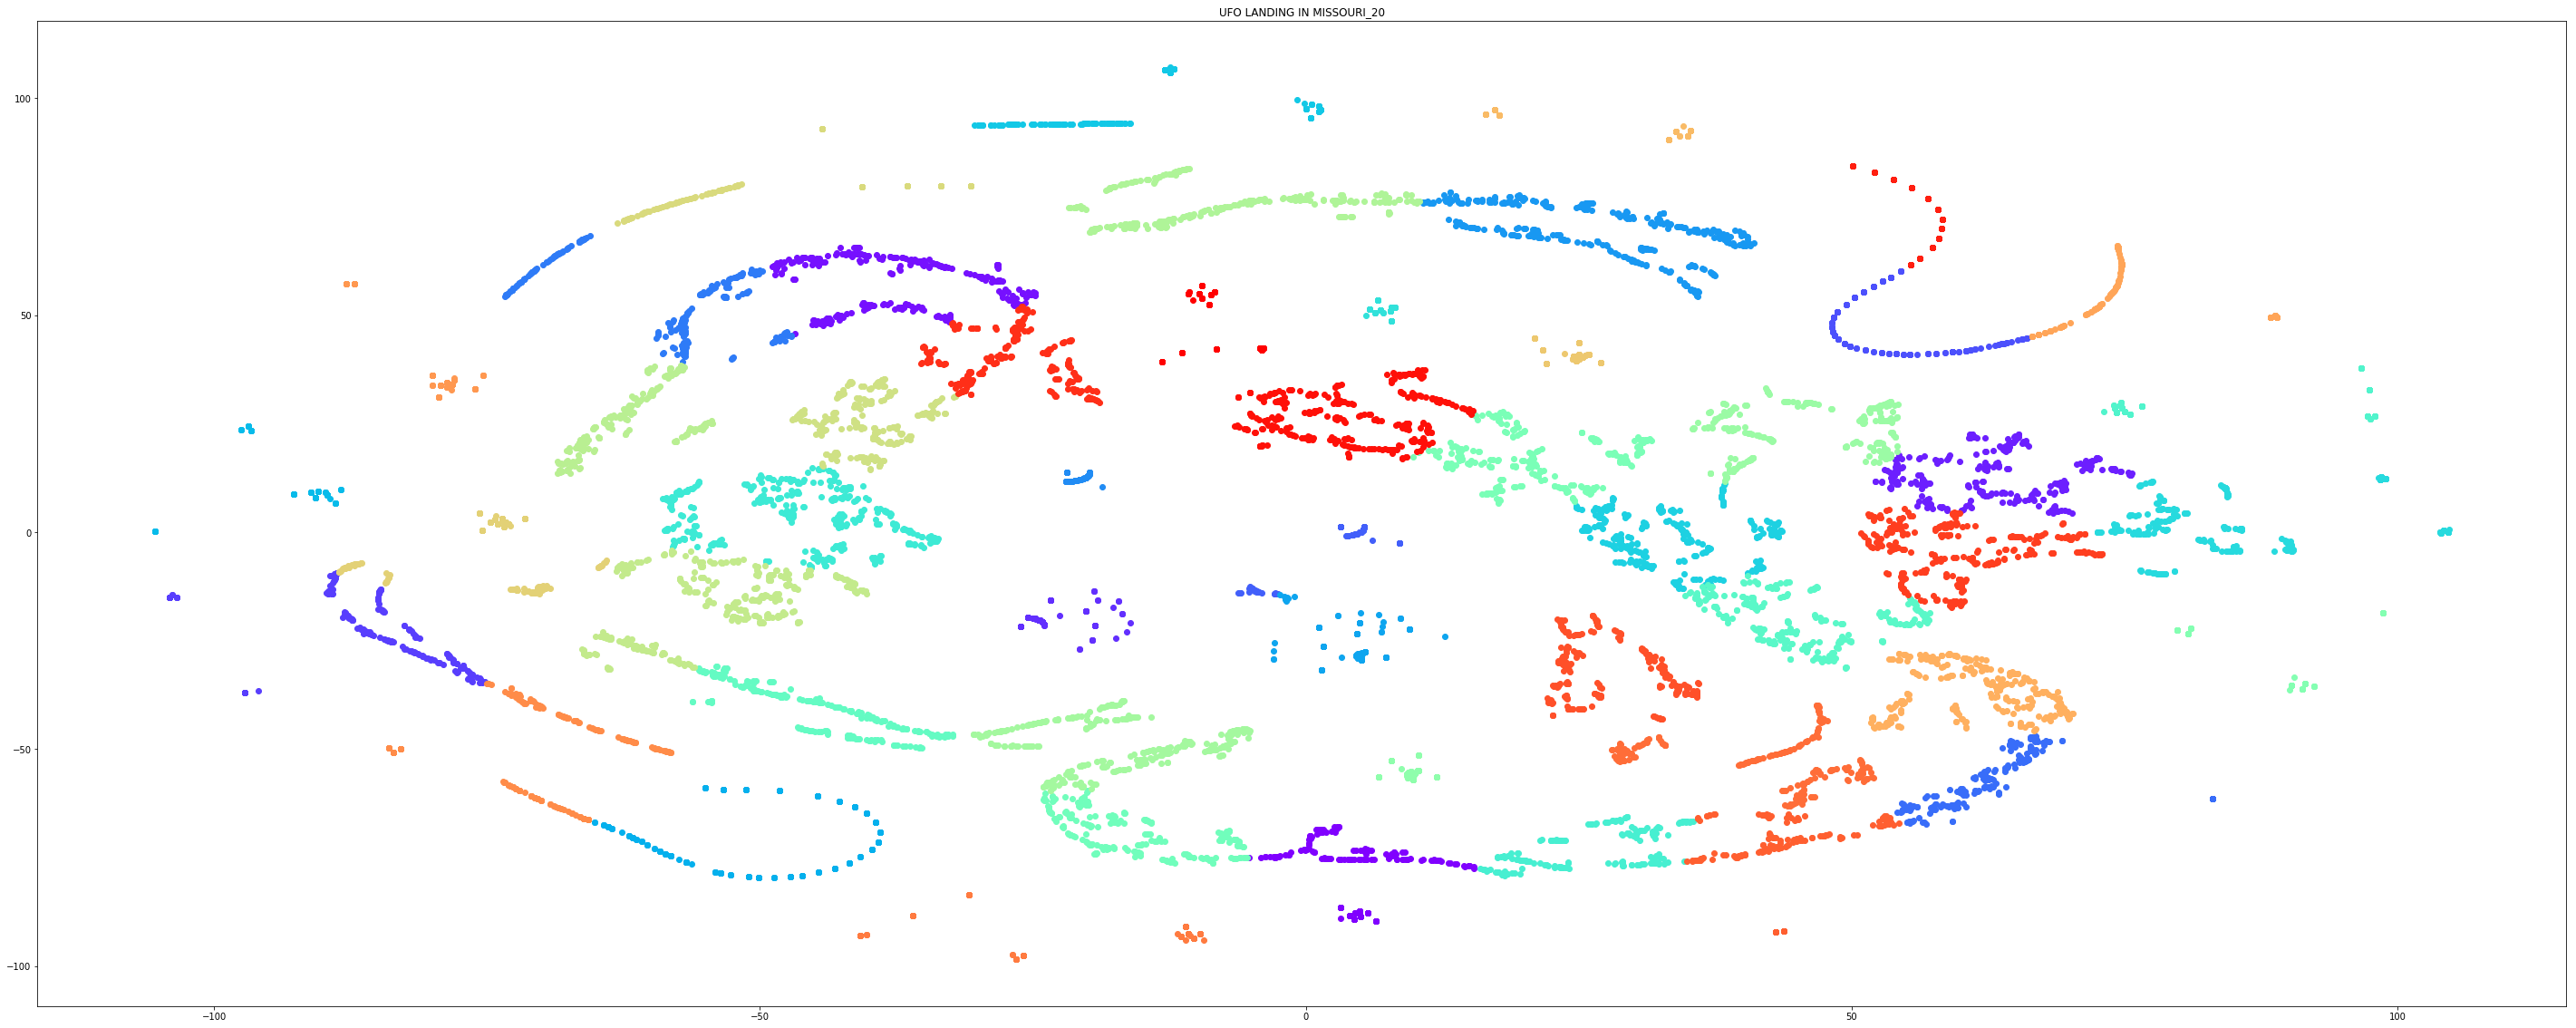

In [103]:
perplexity = 20
tsne = TSNE(n_components=2, perplexity=perplexity)
Y = tsne.fit_transform(result2[['Latitude', 'Longitude', 'DOccurency','SOccurency', 'Timezone', 'Altitude']])
clf.fit_transform(Y)
labels = clf.labels_
fig = plt.figure()
ax = fig.add_subplot(111)
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))
for lab, col in zip(np.unique(labels), colors):
    ax.scatter(Y[labels==lab, 0], Y[labels==lab, 1], color=col)
plt.title(f"UFO LANDING IN MISSOURI_{perplexity}")
plt.savefig(f"UFO LANDING IN MISSOURI {perplexity}.png")

In [147]:
## Importing required Libraries
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from sklearn.preprocessing import StandardScaler
import os 
import shutil
# Generating TSNE 
perplexity = 100
PATH = os.getcwd()
# LOG_DIR = PATH + f'/tensorlog/{perplexity}'
metadata = PATH + f'/tensorlog/metadata.tsv'
# metadata = os.path.join(LOG_DIR, 'df_labels.tsv')
# os.makedirs(LOG_DIR)
with open(metadata, 'w') as metadata_file:
    for label in result2['Timezone'].values:
        metadata_file.write(f'{label}\n')
# tsne = TSNE(n_components=3, perplexity=perplexity)
# df = result2[['Latitude', 'Longitude', 'DOccurency','SOccurency', 'Timezone', 'Altitude']]
# print(metadata, LOG_DIR)
# tsne_pca = pd.DataFrame(tsne.fit_transform(df))
# print("REACHED HERE")
# tsne_pca = tsne_pca.values
tsne_pca = np.load('tsnedata.npy')
# print("CALCULATED TSNE")
# ## TensorFlow Variable from data
tf_data = tf.Variable(tsne_pca)
# tf_labels = tf.C
# ## Running TensorFlow Session
with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf_data.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()

    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name

    # Link this tensor to its metadata(Labels) file
    embedding.metadata_path = metadata

    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

In [122]:
np.save('tsnedata.npy', tsne_pca)

In [156]:
source_frequency.columns = ['AirportID', 'SOccurency']
dest_frequency.columns = ['AirportID', 'DOccurency']
result2 = pd.concat([airports[['AirportID', 'Latitude', 'Longitude', 'Altitude', 'Timezone']], 
                     dest_frequency, source_frequency], sort=True).fillna(0)
result2['Timezone'] = result2['Timezone'].replace('\\N', '0')
result2['Timezone'].astype(float, inplace=True)

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
5       10.0
6       -3.0
7       -3.0
8       -3.0
9       -4.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20      -5.0
21      -6.0
22      -4.0
23      -3.5
24      -8.0
25      -7.0
26      -5.0
27      -5.0
28      -6.0
29      -8.0
        ... 
3291     0.0
3292     0.0
3293     0.0
3294     0.0
3295     0.0
3296     0.0
3297     0.0
3298     0.0
3299     0.0
3300     0.0
3301     0.0
3302     0.0
3303     0.0
3304     0.0
3305     0.0
3306     0.0
3307     0.0
3308     0.0
3309     0.0
3310     0.0
3311     0.0
3312     0.0
3313     0.0
3314     0.0
3315     0.0
3316     0.0
3317     0.0
3318     0.0
3319     0.0
3320     0.0
Name: Timezone, Length: 14191, dtype: float64

In [209]:
### isomaps 
from sklearn.manifold import Isomap, LocallyLinearEmbedding
import matplotlib

comp = 2
neighs = 30

df = result2.sample(500)
labels = df['Timezone'].astype(float).values

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
colors = [cmap(normalize(value)) for value in labels]


lle = LocallyLinearEmbedding(n_components=comp, n_neighbors=neighs, n_jobs=-1, eigen_solver='dense')
Y = lle.fit_transform(df[['Latitude', 'Longitude', 'DOccurency','SOccurency', 'Timezone', 'Altitude']])

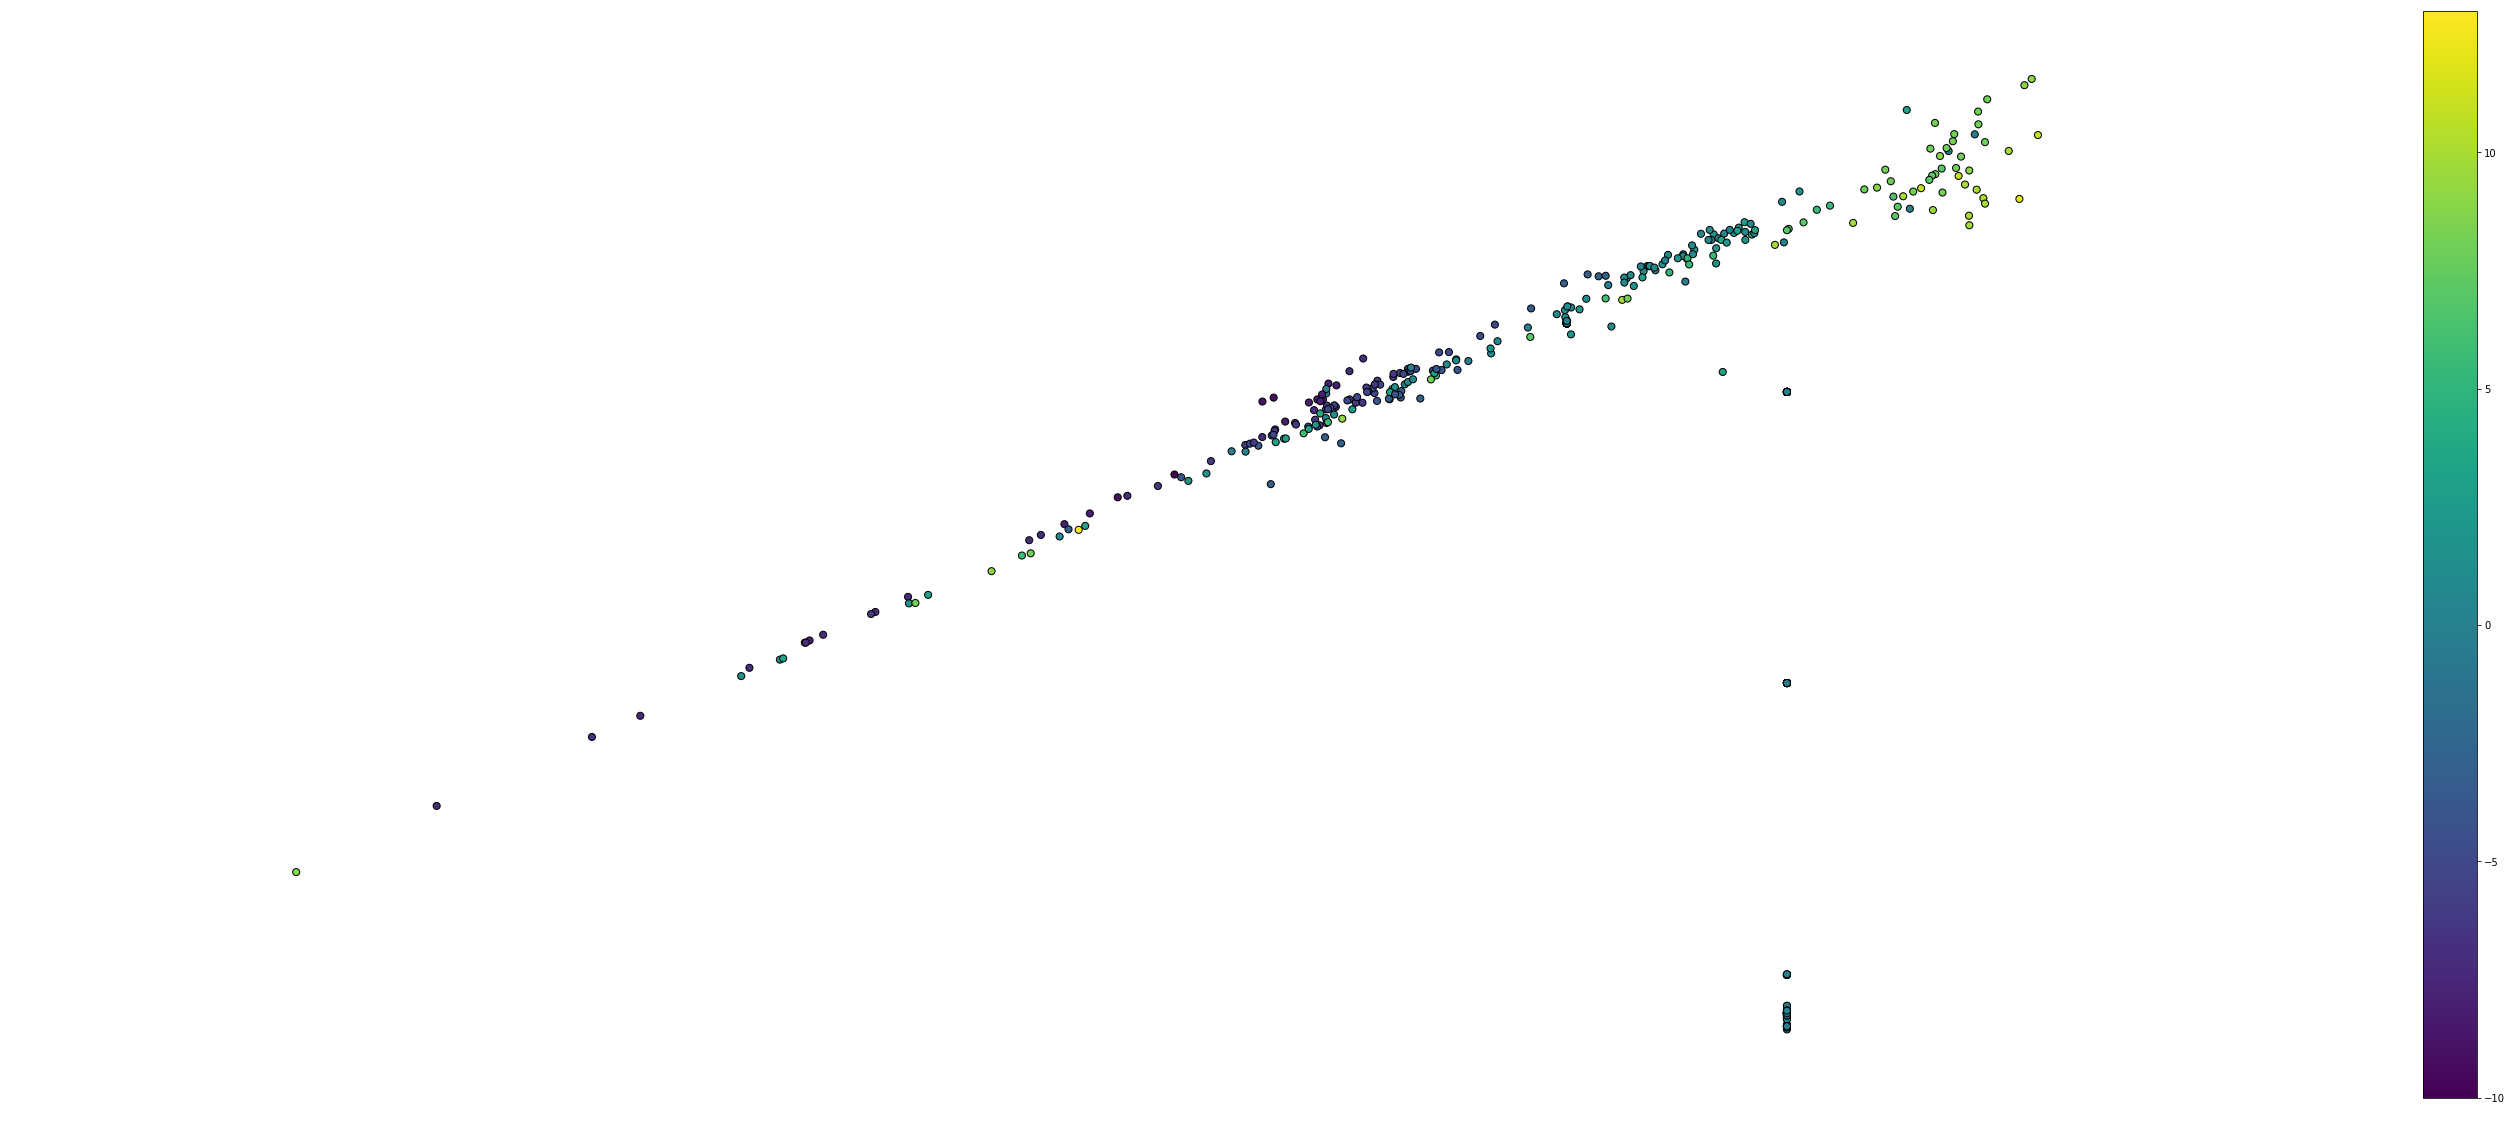

In [210]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(Y[:, 0], Y[:, 1], c=colors,
           s=50, edgecolor='k')
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

ax.axis('off')
plt.savefig(
    f'LLE_OPEN_FLIGHT_{neighs}_TZ{len(labels)}', dpi=300)

In [211]:
isomap = Isomap(n_components=comp, n_neighbors=neighs, n_jobs=-1, eigen_solver='dense')
Y = isomap.fit_transform(df[['Latitude', 'Longitude', 'DOccurency','SOccurency', 'Timezone', 'Altitude']])

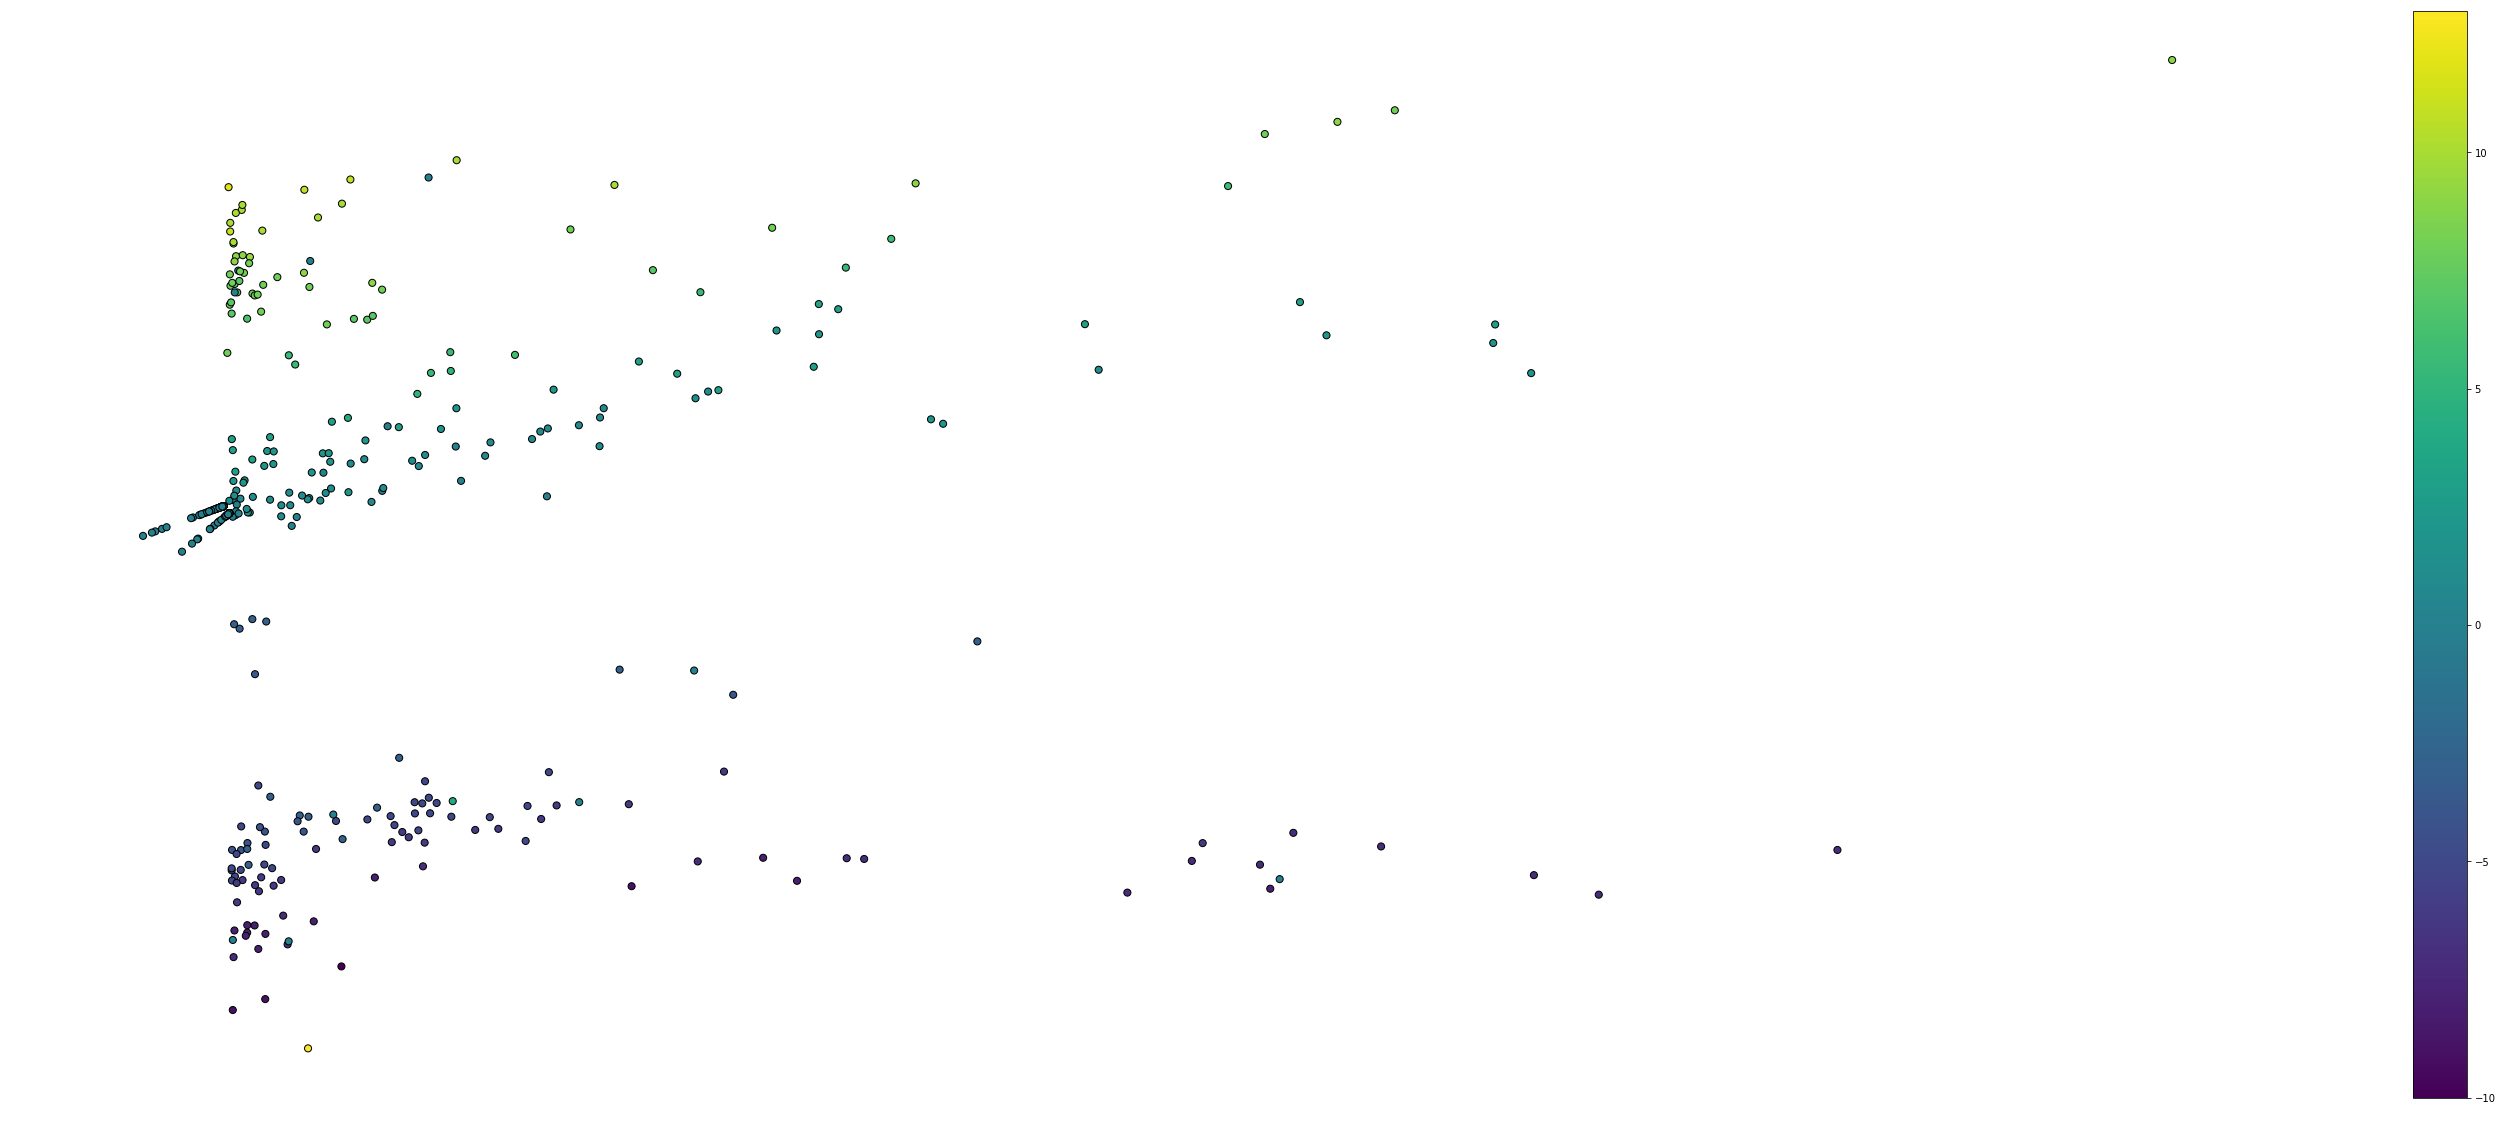

In [212]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(Y[:, 0], Y[:, 1], c=colors,
           s=50, edgecolor='k')
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

ax.axis('off')
plt.savefig(
    f'ISOMAP_OPEN_FLIGHT_{neighs}_TZ{len(labels)}', dpi=300)

In [238]:
def custom_metric(row1, row2):
    return np.sum([row1[3:],row2[3:]])/np.sum(np.diff([row1[:3],row2[:3]], axis=0))
perplexity = 35
tsne = TSNE(n_components=2, perplexity=perplexity, metric=custom_metric)
df = result2.sample(1000)

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
colors = [cmap(normalize(value)) for value in labels]

Y = tsne.fit_transform(df[['Latitude', 'Longitude', 'Altitude','DOccurency','SOccurency']])

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


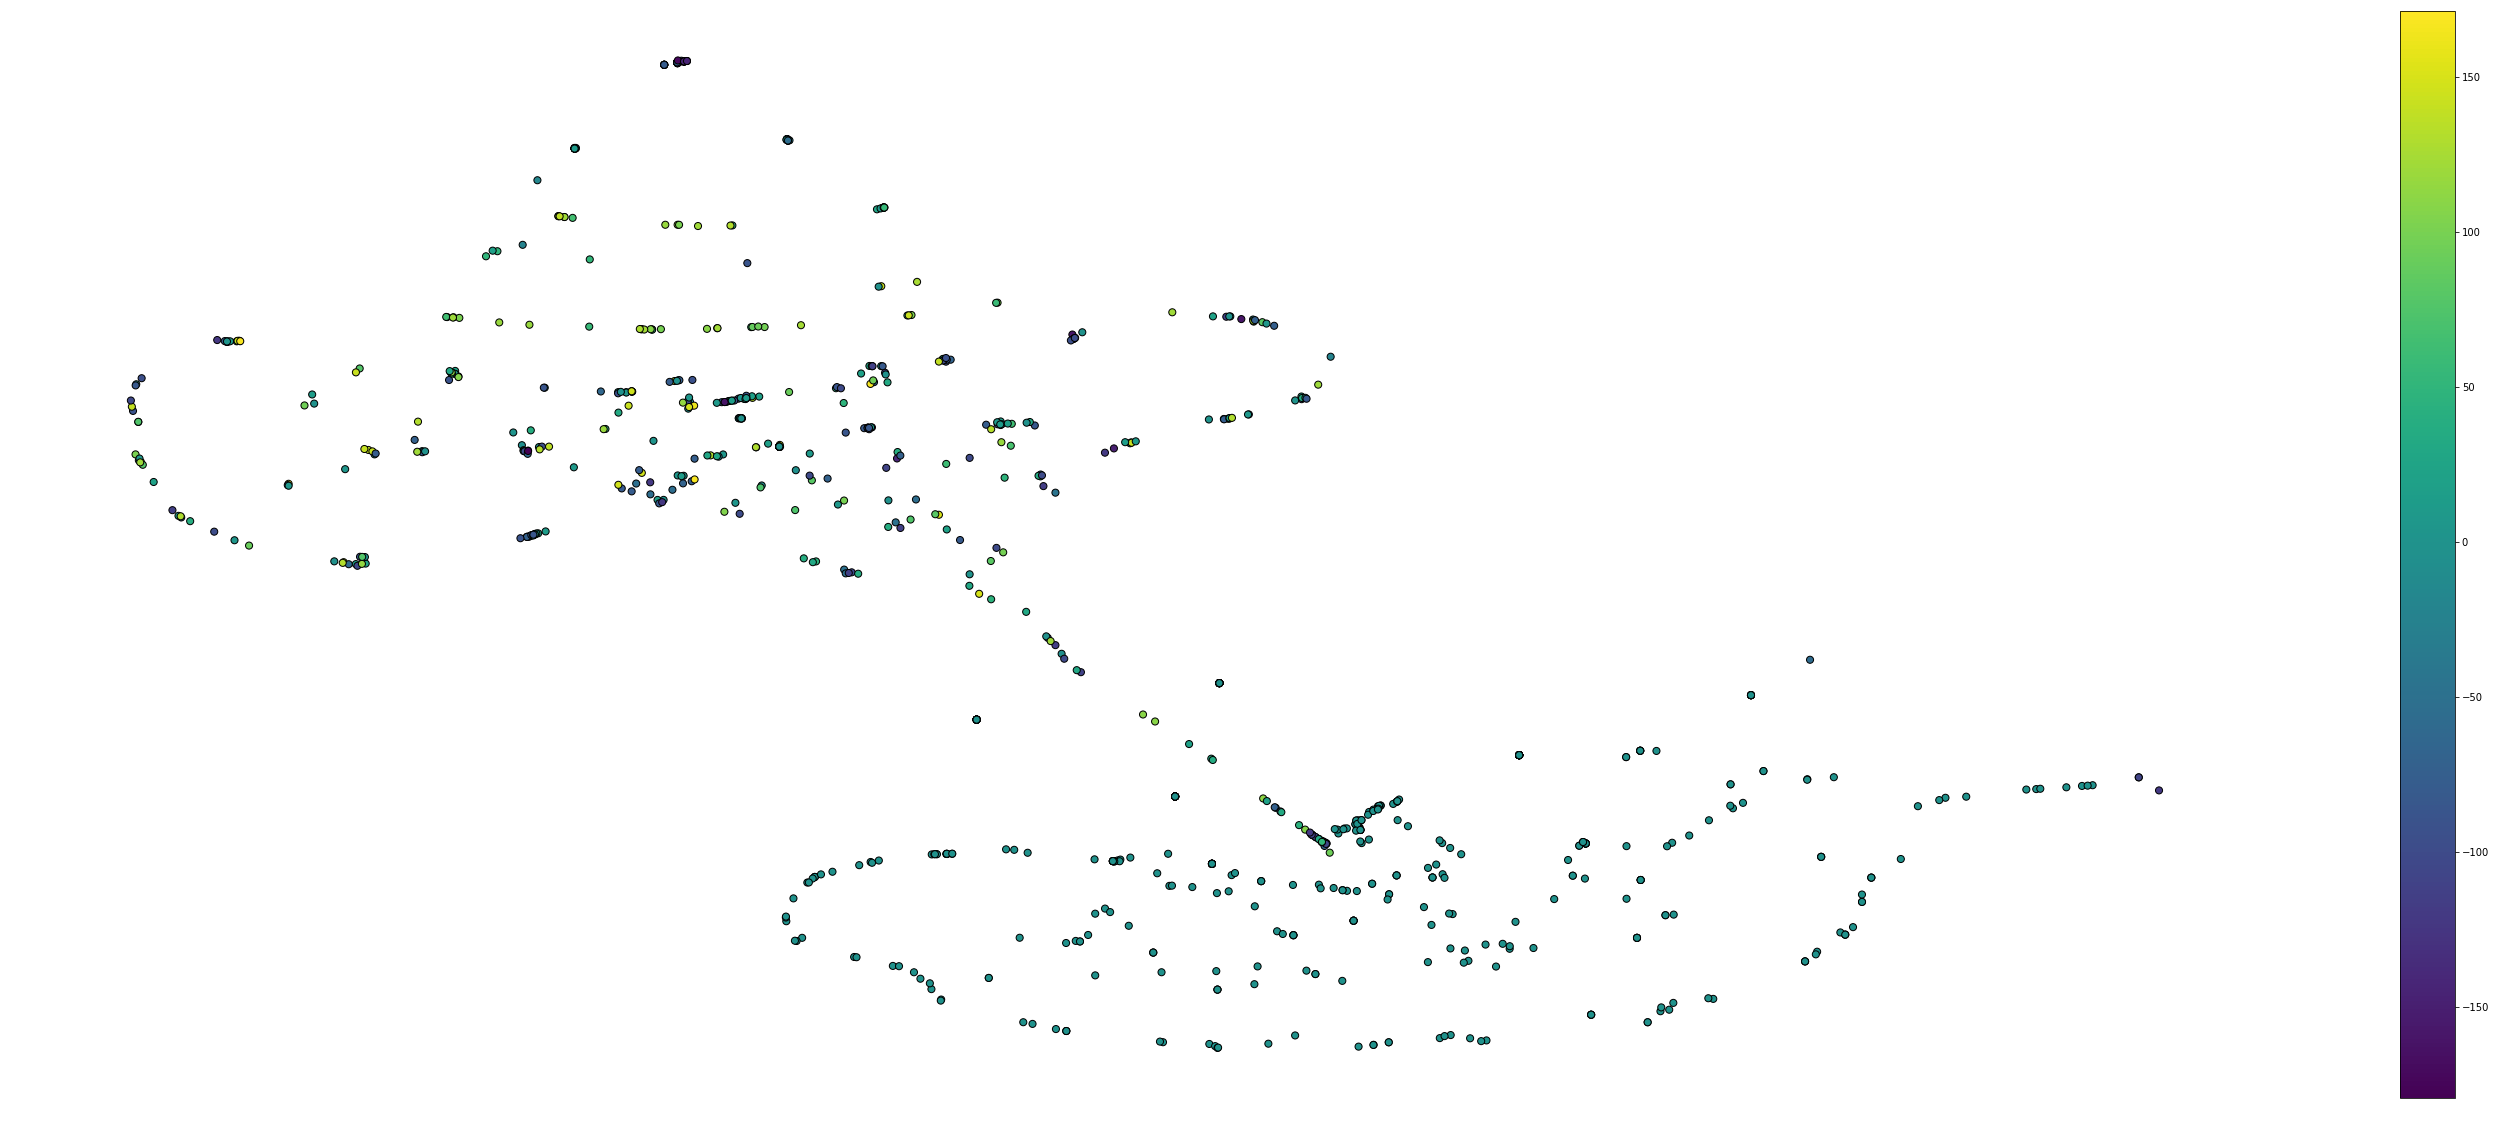

In [247]:
fig = plt.figure()
ax = plt.subplot(111)
label = 'Longitude'
labels = df[label].astype(float).values
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
colors = [cmap(normalize(value)) for value in labels]

ax.scatter(Y[:, 0], Y[:, 1], c=colors,
           s=50, edgecolor='k')
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

ax.axis('off')
plt.savefig(
    f'TSNE_OPEN_FLIGHT_{perplexity}_{label}{len(labels)}_Custom', dpi=300)